This method refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. There are several `linkage` criteria that can be used to determine the similarity between two clusters, and the choice of linkage criteria can have a strong effect on the results. The most common linkage criteria are:

- `ward`: minimizes the variance of the clusters being merged.
- `average`: uses the average of the distances of each observation of the two sets.
- `complete`: uses the maximum distances between all observations of the two sets.

The choice of linkage criteria can have a strong effect on the results. In general, `ward` is the most effective linkage criteria, but it is also the most computationally expensive. If the clusters have very dissimilar numbers of elements, `ward` can produce unbalanced clusters. In that case, `average` or `complete` are better choices.

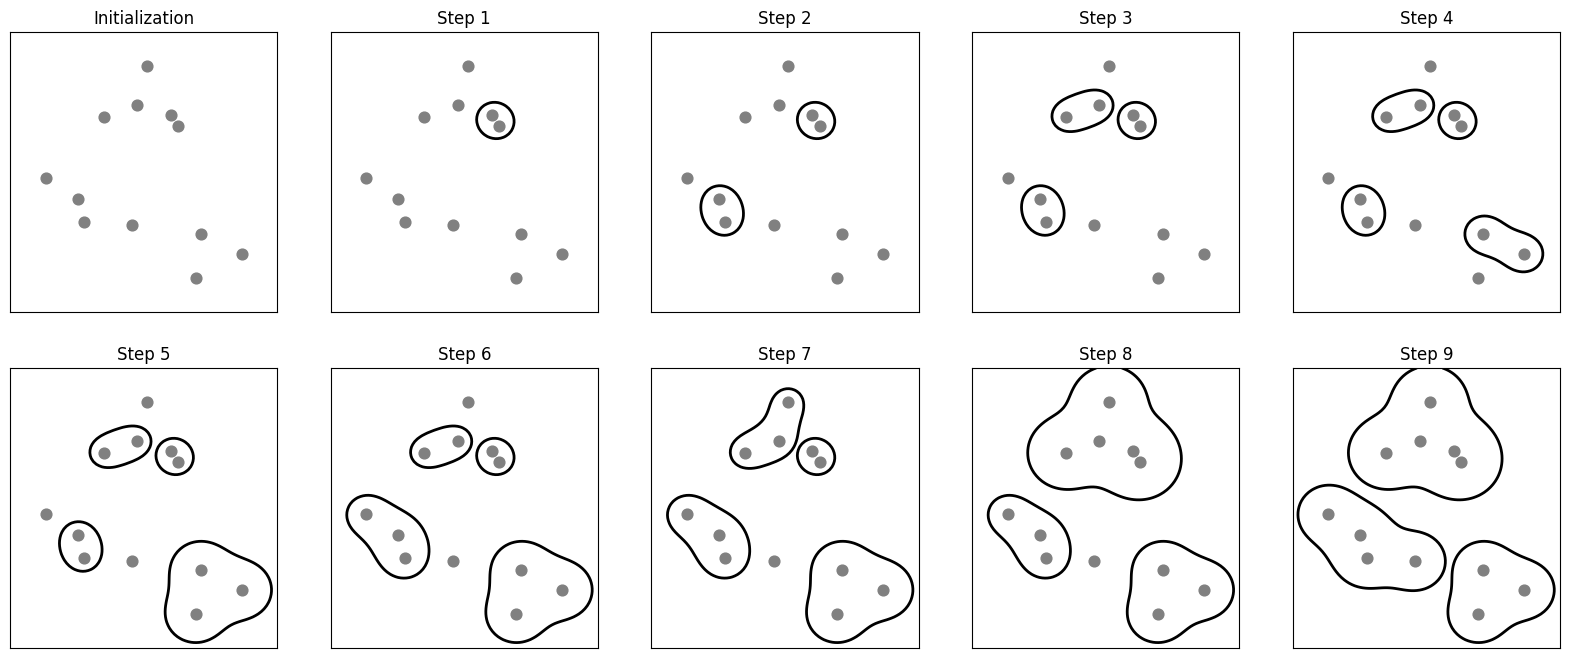

In [1]:
import mglearn

mglearn.plots.plot_agglomerative_algorithm()

We can easily see that at step 1 to 4, only two closest points are merged. At step 5, the two clusters are merged. The distance between two clusters is the distance between the closest points in the two clusters. The distance between two points is the Euclidean distance.

Text(0, 0.5, 'Feature 1')

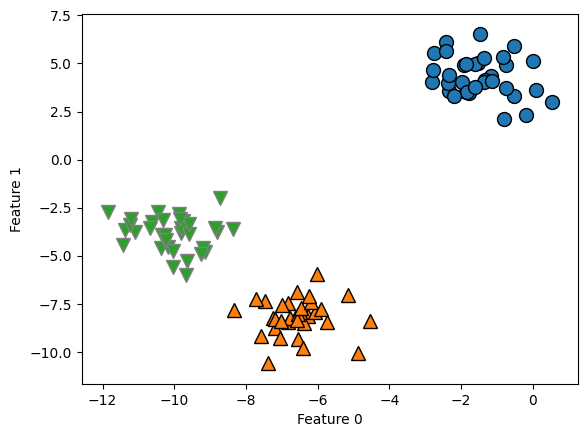

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
pred = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], pred)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The algorithm is as follows:
- Start with n clusters, each with one element.
- Find the closest pair of clusters and merge them.
- Repeat until only a single cluster remains.

As expected, the algorithm is very simple and easy to implement and recovers the true clusters in the data.

#### Hierarchical clustering and dendrogram

The Agglomerative Clustering, also call some times Hierarchical Clustering, is a type of clustering that is based on the hierarchical agglomerative clustering algorithm. This algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The result of this algorithm is a tree-based representation of the data, called a dendrogram. The dendrogram can be cut at any level to produce a flat clustering.

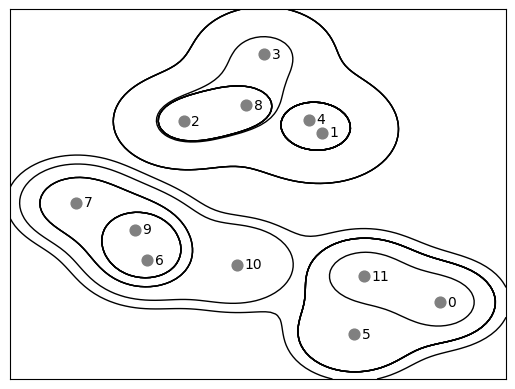

In [5]:
mglearn.plots.plot_agglomerative()

While this visualization is very useful for understanding the structure of the data, it is not practical for large datasets. The algorithm has a time complexity of O(n^3), and a space complexity of O(n^2). This makes it impractical for large datasets, and the algorithm has a time complexity of O(n^2) and a space complexity of O(n) when the `ward` linkage criteria is used. This makes it practical for large datasets.

But not so lucky, `scikit-learn` doesn't have the function to plot the dendrogram. We have to use `scipy` to plot the dendrogram.

Text(0, 0.5, 'Cluster distance')

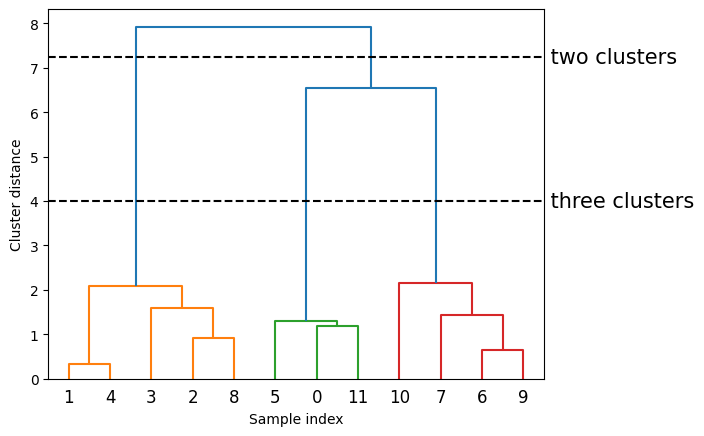

In [8]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state = 0, n_samples = 12)
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c = 'k')
ax.plot(bounds, [4, 4], '--', c = 'k')
ax.text(bounds[1], 7.25, ' two clusters', va = 'center', fontdict = {'size': 15})
ax.text(bounds[1], 4, ' three clusters', va = 'center', fontdict = {'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

The dendrogram is a tree-like diagram that records the sequences of merges or splits. The y-axis in the dendrogram is the distance or dissimilarity between clusters. The x-axis is the data points. Reading from bottom to top, the dendrogram shows the history of merges or splits. The height of the dendrogram at each merge or split shows the distance or dissimilarity at which the merge or split occurred. The dendrogram can be cut at any level to produce a flat clustering.

But agglomerative clustering still fails at separating complex data set like two moons. But we can use DBSCAN in the next section to solve this problem.